# Setup

In [ ]:
import os
import random
import shutil
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import PIL
import PIL.Image
import tensorflow_hub as hub
from tqdm import tqdm
# import tensorflowjs as tfjs

from google.colab import drive, files
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# Mount google drive
drive.mount('/content/drive/')

# Unzip dataset file
!unzip "/content/drive/MyDrive/Capstone Project ML/Zipped dataset/Dataset_Experimen_Khresna/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug).zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/43.jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/44 (2).jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/44.jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/45 (2).jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/45.jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/46 (2).jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/46.jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/47 (2).jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/47.jpg  
  inflating: /content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)/P/48 (2).jpg  
  inflating: /content/Dataset_KhresnaV4

In [ ]:
# Dataset path
data_dir = pathlib.Path('/content/Dataset_KhresnaV4(NoSplit, NoPersonInBackground, NoAug)')

# Image count
image_count = len(list(data_dir.glob('*/*.jpg'))) + len(list(data_dir.glob('*/*.JPG'))) + len(list(data_dir.glob('*/*.png'))) + len(list(data_dir.glob('*/*.PNG')))
print(image_count)

12525


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100, 100),
  batch_size=32)

Found 12525 files belonging to 26 classes.
Using 10020 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(100, 100),
  batch_size=3)

Found 12525 files belonging to 26 classes.
Using 2505 files for validation.


In [ ]:
class_names = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J','K','L',
                        'M', 'N', 'O', 'P', 'Q', 'R','S','T','U','V','W','X','Y','Z'])
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [ ]:
#normalisasi
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_data = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(26, activation = 'softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

history = model.fit(train_data, validation_data = val_data, epochs=10)

Epoch 1/10
314/314 [==============================] - 143s 404ms/step - loss: 1.9396 - accuracy: 0.4539 - val_loss: 0.6883 - val_accuracy: 0.8136
Epoch 2/10
314/314 [==============================] - 134s 419ms/step - loss: 0.3885 - accuracy: 0.8956 - val_loss: 0.2885 - val_accuracy: 0.9285
Epoch 3/10
314/314 [==============================] - 136s 429ms/step - loss: 0.1285 - accuracy: 0.9635 - val_loss: 0.2493 - val_accuracy: 0.9401
Epoch 4/10
314/314 [==============================] - 132s 411ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.2169 - val_accuracy: 0.9549
Epoch 5/10
314/314 [==============================] - 133s 417ms/step - loss: 0.0501 - accuracy: 0.9865 - val_loss: 0.2031 - val_accuracy: 0.9609
Epoch 6/10
314/314 [==============================] - 132s 412ms/step - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.1872 - val_accuracy: 0.9601
Epoch 7/10
314/314 [==============================] - 132s 415ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.1390 -

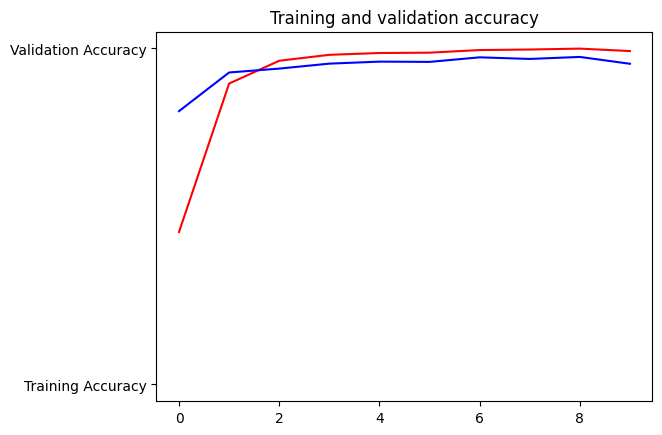

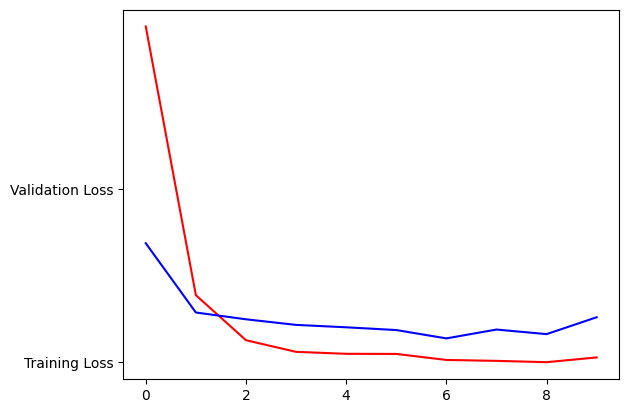

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
path = '/content/drive/MyDrive/sample azzah/20230606_150845.jpg'

image = PIL.Image.open(path)
image = image.resize((100, 100), 0)
x=img_to_array(image)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

predicted_batch = model.predict(images)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 0s 29ms/step
Q


<ipython-input-20-ef328d328901>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  predicted_label_batch = class_names[predicted_id]
